# Fits and characterizes final model for version v5 for outcome

pp_hybrid_wk26_outcome

Gaylen Fronk  
April 24, 2024

## Set Up Environment

In [ ]:
study <- params$study
version <- params$version
cv <- params$cv
algorithms <- params$algorithms
y_col_name <- params$y_col_name


Packages for script

In [ ]:

library(tidymodels)


── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ recipes      1.0.9
✔ dials        1.2.0     ✔ rsample      1.2.0
✔ dplyr        1.1.4     ✔ tibble       3.2.1
✔ ggplot2      3.4.4     ✔ tidyr        1.3.1
✔ infer        1.0.6     ✔ tune         1.1.2
✔ modeldata    1.3.0     ✔ workflows    1.1.3
✔ parsnip      1.1.1     ✔ workflowsets 1.0.1
✔ purrr        1.0.2     ✔ yardstick    1.3.0

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ purrr::discard() masks scales::discard()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks stats::lag()
✖ recipes::step()  masks stats::step()
• Learn how to get started at https://www.tidymodels.org/start/

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats   1.0.0     ✔ readr     2.1.5
✔ lubridate 1.9.3     ✔ stringr   1.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ readr::col_factor() masks scales::col_factor()
✖ purrr::discard()    masks scales::discard()
✖ dplyr::filter()     masks stats::filter()
✖ stringr::fixed()    masks recipes::fixed()
✖ dplyr::lag()        masks stats::lag()
✖ readr::spec()       masks yardstick::spec()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Attaching package: 'Matrix'

The following objects are masked from 'package:tidyr':

    expand, pack, unpack


Attaching package: 'probably'

The following objects are masked from 'package:base':

    as.factor, as.ordered

here() starts at C:/Users/gfronk/Documents/GitHub/study_match

ℹ SHA-1 hash of file is "c045eee2655a18dc85e715b78182f176327358a7"

ℹ SHA-1 hash of file is "bb7bddab14e337e74cb65ad3b94d58a2492d34cd"

Handle conflicts

In [ ]:

options(conflicts.policy = "depends.ok")


Absolute paths

In [ ]:
switch (Sys.info()[['sysname']],
        # PC paths
        Windows = {
          path_input <- stringr::str_c("P:/studydata/match/chtc/", 
                                       y_col_name)
          path_models <- stringr::str_c("P:/studydata/match/models/", 
                                        y_col_name)},
        
        # IOS paths
        Darwin = {
          path_input <- stringr::str_c("/Volumes/private/studydata/match/chtc/", 
                                       y_col_name)
          path_models <- stringr::str_c("/Volumes/private/studydata/match/models/", 
                                        y_col_name)},
        
        # Linux paths
        Linux = {
          path_input <- stringr::str_c("~/mnt/private/studydata/match/chtc/", 
                                       y_col_name)
          path_models <- stringr::str_c("~/mnt/private/studydata/match/models/", 
                                        y_col_name)}
)


Chunk Defaults

In [ ]:

knitr::opts_chunk$set(attr.output='style="max-height: 500px;"')

options(tibble.width = Inf)
options(tibble.print_max = Inf)


## Read in best configuration

Selected in 1_metrics_inner (k-fold CV)

In [ ]:
best_config <- read_csv(file.path(path_models, 
                                  str_c("best_config_", version, ".csv")),
                        show_col_types = FALSE)

glimpse(best_config)


Rows: 1
Columns: 14
$ n_jobs       <dbl> 10
$ algorithm    <chr> "xgboost"
$ feature_set  <chr> "item_knn_5"
$ hp1          <dbl> 0.01
$ hp2          <dbl> 3
$ hp3          <dbl> 50
$ resample     <chr> "up_1"
$ accuracy     <dbl> 0.6697248
$ bal_accuracy <dbl> 0.6315083
$ roc_auc      <dbl> 0.6799157
$ sens         <dbl> 0.5166667
$ spec         <dbl> 0.7361362
$ ppv          <dbl> 0.3514706
$ npv          <dbl> 0.81173

## Fit best model in full dataset

In [ ]:
batch_names <- list.dirs(path_input, full.names = FALSE, recursive = FALSE) 

batch_name <- batch_names[str_detect(batch_names, "train") & 
                            str_detect(batch_names, cv) &
                            str_detect(batch_names, version) &
                            str_detect(batch_names, best_config$algorithm)] 

path_batch <- file.path(path_input, batch_name)
source(file.path(path_batch, "input", "training_controls.R"))

d <- read_csv(file.path(path_batch, "input", "data_trn.csv"), 
              show_col_types = FALSE) 

d_outcomes <- d |> 
  select(subid, ends_with("outcome") & contains("hybrid"))

d <- format_data(d) 

rec <- build_recipe(d = d, config = best_config)

rec_prepped <- rec |> 
  prep(training = d, strings_as_factors = FALSE)

feat_all <- rec_prepped |> 
  bake(new_data = d)

model_best <- fit_best_model(best_model = best_config, 
                             feat = feat_all, 
                             ml_mode = "classification")


### SHAP for Feature Importance (using 1x 10-fold held-out folds)

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable with zero or non-finite range.

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable with zero or non-finite range.

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable with zero or non-finite range.

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable with zero or non-finite range.

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable with zero or non-finite range.

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable with zero or non-finite range.

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable with zero or non-finite range.

Warning in gower_work(x = x, y = y, pair_x = pair_x, pair_y = pair_y, n = n, :
skipping variable 

`summarise()` has grouped output by 'id_obs'. You can override using the
`.groups` argument.

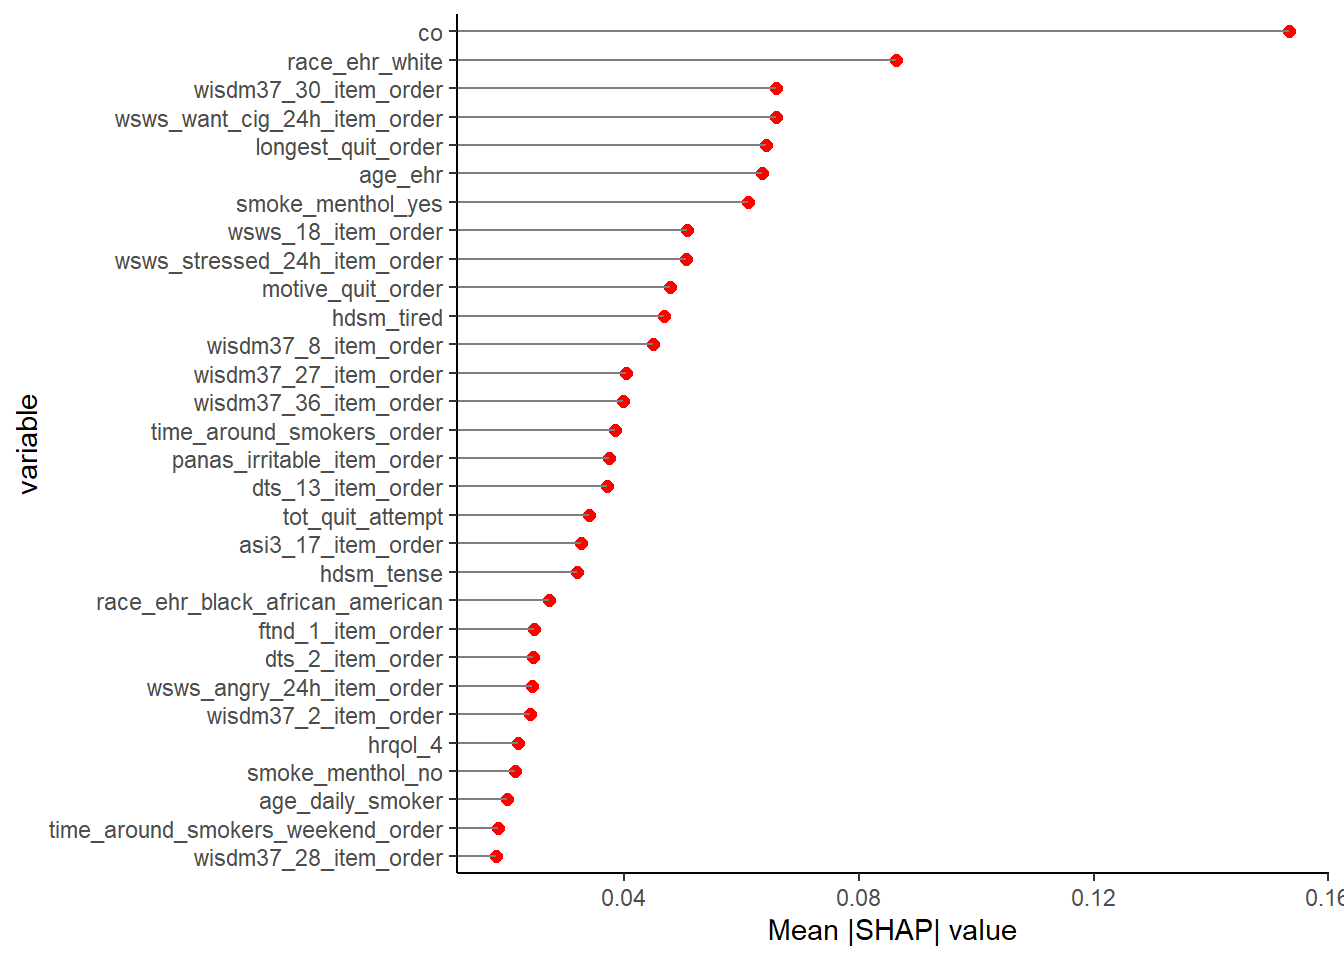

[1] 0.0022278257 0.0041012774 0.0003676106

Rows: 3
Columns: 3
$ variable   <fct> treatment_patch, treatment_combo_nrt, treatment_varenicline
$ mean_value <dbl> 0.0041012774, 0.0022278257, 0.0003676106
$ shap_rank  <int> 131, 189, 285

In [ ]:
splits <- d %>% 
  make_splits(cv_resample_type, cv_resample, cv_outer_resample, 
              cv_inner_resample, cv_group, seed_splits)

all_shaps <- NULL

split_nums <- 1:nrow(splits)

for (split_num in split_nums) {
  
  d_in <- training(splits$splits[[split_num]]) 
  d_out <- testing(splits$splits[[split_num]])
  
  rec <- build_recipe(d = d_in, config = best_config)
  rec_prepped <- rec |> 
    prep(training = d_in, strings_as_factors = FALSE)
  
  feat_in <- rec_prepped |> 
    bake(new_data = NULL)
  
  model_best <- fit_best_model(best_config, feat = feat_in,
                               "classification")
  
  feat_out <- rec_prepped |> 
    bake(new_data = d_out)
  
  # SHAP in held out fold
  shaps_out <- SHAPforxgboost::shap.prep(
    xgb_model = extract_fit_engine(model_best),
    X_train = feat_out |> 
      select(-y) |>  
      as.matrix()) |> 
    mutate(id_obs = rep(d_out$subid, times = ncol(feat_out) - 1),
           split_num = split_num) |>  
    relocate(id_obs, split_num)
  
  all_shaps <- all_shaps %>% 
    bind_rows(shaps_out)
}


## Calculate and calibrate probabilities

Make triplicate dataset

In [ ]:
d_patch <- d |> 
  mutate(treatment = "patch") 

d_combo <- d |> 
  mutate(treatment = "combo_nrt")

d_varen <- d |> 
  mutate(treatment = "varenicline")

d_trip <- bind_rows(d_patch, d_combo) |> 
  bind_rows(d_varen) |> 
  mutate(treatment = factor(treatment, 
                            levels = c(
                              "patch",
                              "varenicline",
                              "combo_nrt")))


Build triplicate feature set

In [ ]:
feat_trip <- rec_prepped |> 
  bake(new_data = d_trip) 


Get raw and calibrated probabilities

In [ ]:
# raw (uncalibrated) predictions for triplicated dataset
preds_prob <- predict(model_best, feat_trip,
                      type = "prob")

# fit calibration model
set.seed(2468)
cal_split <- d |> 
  initial_split(prop = 3/4, strata = y)
d_cal_in <- training(cal_split) 
d_cal_out <- testing(cal_split)

rec_cal_prepped <- rec |> 
  prep(training = d_cal_in, strings_as_factors = FALSE)

feat_cal_in <- rec_cal_prepped |> 
  bake(new_data = NULL) 

feat_cal_out <- rec_cal_prepped |> 
  bake(new_data = d_cal_out) 

model_cal <- fit_best_model(best_config, feat = feat_cal_in, "classification")

# # beta calibration
# beta <- predict(model_cal, feat_cal_out,
#                 type = "prob") |>
#   mutate(truth = feat_cal_out$y) |>
#   cal_estimate_beta(truth = truth,
#                     estimate = dplyr::starts_with(".pred_"),
#                     smooth = TRUE)
# preds_prob_beta <- preds_prob |>
#   cal_apply(beta)
# 
# # iso calibration
# iso <- predict(model_cal, feat_cal_out,
#                type = "prob") |>
#   mutate(truth = feat_cal_out$y) |>
#   cal_estimate_isotonic(truth = truth,
#                         estimate = dplyr::starts_with(".pred_"))
# preds_prob_iso <- preds_prob |>
#   cal_apply(iso)
# 
# # logistic calibration
# logi <- predict(model_cal, feat_cal_out,
#                 type = "prob") |>
#   mutate(truth = feat_cal_out$y) |>
#   cal_estimate_logistic(truth = truth,
#                         estimate = dplyr::starts_with(".pred_"),
#                         smooth = TRUE)
# preds_prob_logi <- preds_prob |>
#   cal_apply(logi)

# combine raw and calibrated probs
probs <- tibble(subid = d_trip$subid,
                tx = d_trip$treatment,
                prob_raw = preds_prob[[str_c(".pred_", y_level_pos)]])
#prob_beta = preds_prob_beta[[str_c(".pred_", y_level_pos)]],
#prob_iso = preds_prob_iso[[str_c(".pred_", y_level_pos)]],
#prob_logi = preds_prob_logi[[str_c(".pred_", y_level_pos)]]) 

glimpse(probs)


### Make AIM 2 Dataset

Pivot probabilities into wide format & select only raw probability (based on calibration validity check below)

In [ ]:
raw_probs_wide <- probs |> 
  select(subid, tx, prob_raw) |> 
  pivot_wider(names_prefix = "prob_",
              names_from = tx,
              values_from = prob_raw)

glimpse(raw_probs_wide)


Join with d & create new variables

In [ ]:
d_aim_2 <- d |> 
  select(subid, tx_rct = treatment, outcome_rct_wk4 = y) |> 
  left_join(raw_probs_wide, by = "subid") |> 
  mutate(tx_best = case_when(
    prob_patch > prob_combo_nrt & prob_patch > prob_varenicline ~ "patch",
    prob_combo_nrt > prob_patch & prob_combo_nrt > prob_varenicline ~ "combo_nrt",
    prob_varenicline > prob_patch & prob_varenicline > prob_combo_nrt ~ "varenicline",
    TRUE ~ NA_character_
  )) |> 
  mutate(prob_best = case_when(
    tx_best == "patch" ~ prob_patch,
    tx_best == "combo_nrt" ~ prob_combo_nrt,
    tx_best == "varenicline" ~ prob_varenicline,
    TRUE ~ NA_real_
  )) |> 
  mutate(tx_best = factor(tx_best, 
                          levels = c(
                            "patch",
                            "varenicline",
                            "combo_nrt"))) |> 
  mutate(tx_match = if_else(tx_best == tx_rct, TRUE, FALSE)) |> 
  left_join(d_outcomes, by = "subid") |> 
  select(-pp_hybrid_wk4_outcome, -pp_hybrid_wk1_outcome, -pp_hybrid_yr3_outcome) |> # already in there from d
  rename(outcome_rct_wk12 = pp_hybrid_wk12_outcome,
         outcome_rct_wk26 = pp_hybrid_wk26_outcome,
         outcome_rct_wk52 = pp_hybrid_wk52_outcome) |> 
  relocate(subid, tx_rct, tx_best, tx_match,
           prob_best, starts_with("outcome"), starts_with("prob"))

glimpse(d_aim_2)


Quick EDA checks

In [ ]:
# confirm logic worked as expected
head(d_aim_2)

# check on variability of best tx
janitor::tabyl(d_aim_2$tx_best)

# check on variability of tx matching
janitor::tabyl(d_aim_2$tx_match)

# variability of matching within assignned (RCT) tx
d_aim_2 |> 
  group_by(tx_rct) |> 
  tab(tx_match)


Write out

In [ ]:
d_aim_2 |> 
  write_csv(file.path(path_models, str_c("aim_2_", version, "_", 
                                         y_col_name, ".csv")))

d_aim_2 |> 
  write_csv(here("/objects", str_c("aim_2_", version, "_", 
                                   y_col_name, ".csv")))


### Validity check: Model Calibration

Make wide format for all calibrated probabilities

In [ ]:
all_probs_wide <- probs |> 
  rename_with(~ str_replace(.x, "prob_", ""), .cols = starts_with("prob_")) |> 
  pivot_wider(
    names_from = tx,
    values_from = c(raw, beta, iso, logi),
    names_glue = "{.value}_{tx}"
  )


Set up validity check data

In [ ]:
d_valid <- d_aim_2 |> 
  select(subid, tx_rct, outcome_rct_wk4) |> 
  left_join(all_probs_wide, by = "subid") |> 
  mutate(beta = case_when(
    tx_rct == "patch" ~ beta_patch,
    tx_rct == "combo_nrt" ~ beta_combo_nrt,
    tx_rct == "varenicline" ~ beta_varenicline,
    TRUE ~ NA_real_
  ),
  raw = case_when(
    tx_rct == "patch" ~ raw_patch,
    tx_rct == "combo_nrt" ~ raw_combo_nrt,
    tx_rct == "varenicline" ~ raw_varenicline,
    TRUE ~ NA_real_
  ),
  isotonic = case_when(
    tx_rct == "patch" ~ iso_patch,
    tx_rct == "combo_nrt" ~ iso_combo_nrt,
    tx_rct == "varenicline" ~ iso_varenicline,
    TRUE ~ NA_real_
  ),
  logistic = case_when(
    tx_rct == "patch" ~ logi_patch,
    tx_rct == "combo_nrt" ~ logi_combo_nrt,
    tx_rct == "varenicline" ~ logi_varenicline,
    TRUE ~ NA_real_
  )) |> 
  select(subid, outcome_rct_wk4, beta, raw, isotonic, logistic) 


Compare mean abstinence from RCT to predicted probabilities for RCT tx across calibrations

In [ ]:
d_valid |> 
  mutate(outcome_rct = if_else(outcome_rct_wk4 == "abstinent", 1, 0)) |> 
  summarize(mean_rct = mean(outcome_rct_wk4),
            mean_beta = mean(beta),
            mean_iso = mean(isotonic),
            mean_logi = mean(logistic),
            mean_raw = mean(raw))


Raw probabilities appear to match the outcome best.

#### Plots

Pivot data longer for required format

In [ ]:
d_plot <- d_valid |> 
  pivot_longer(
    cols = c(beta, raw, isotonic, logistic),
    names_to = "method",
    values_to = ".pred_abstinent"
  )


Make plots by calibration method

In [ ]:
d_plot |> 
  cal_plot_breaks(truth = outcome_rct_wk4, 
                  estimate = .pred_abstinent,
                  .by = method)

d_plot |> 
  cal_plot_windowed(truth = outcome_rct_wk4, 
                    estimate = .pred_abstinent,
                    .by = method)


Raw probabilities appear the most well-calibrated: best aligned with diagonal line, spans the fullest range of bins/windows. Will use raw probabilities for AIM 2 analyses (selected above).